In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

In [ ]:
data = pd.read_csv("/content/covid_19_india.csv")
data

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Total cases
0,1,30/01/20,6:00 PM,Kerala,0,0,1,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3,3
...,...,...,...,...,...,...,...,...
18105,18106,11/08/21,8:00 AM,Telangana,638410,3831,650353,1288763
18106,18107,11/08/21,8:00 AM,Tripura,77811,773,80660,158471
18107,18108,11/08/21,8:00 AM,Uttarakhand,334650,7368,342462,677112
18108,18109,11/08/21,8:00 AM,Uttar Pradesh,1685492,22775,1708812,3394304


In [ ]:
# Extract the total number of cases for a single state
X = data["Total cases"].values.reshape(-1,1)
state_data = data[data["Confirmed"] >= 1].groupby(["State/UnionTerritory","Date","Time"]).sum()
X = state_data["Total cases"].values.reshape(-1,1)
# Train the GMM with a single component
gmm = GaussianMixture(n_components=1)
gmm.fit(X)
# Get the estimated mean and covariance of the Gaussian distribution
mean = gmm.means_[0][0]
cov = gmm.covariances_[0][0][0]
print("Estimated mean:", mean)
print("Estimated covariance:", cov)

Estimated mean: 581145.0475531444
Estimated covariance: 1616889287700.325


As the mean and estimated covariance values are coming too large, it could be due to outliers in the data or the data being heavily skewed. In such cases, it may be useful to preprocess the data to remove outliers or reduce the skewness. Here are a few suggestions to try:

Remove outliers: You can try removing the outliers from the data using techniques like winsorization or trimming. Winsorization replaces the extreme values with the nearest non-outlier value, while trimming removes the extreme values altogether.

***Log transformation: If the data is heavily skewed, you can try applying a log transformation to reduce the skewness. This can be done by taking the logarithm of the data before fitting the GMM.***

Standardization: Standardizing the data by subtracting the mean and dividing by the standard deviation can help in reducing the scale of the data. This can be useful if the data has large differences in the magnitude of values.

Increase number of components: If the GMM with a single component is not able to capture the underlying distribution of the data, you can try increasing the number of components in the GMM. However, be careful not to overfit the data.


In [ ]:
# Select the columns to transform
cols_to_transform = ["Cured", "Deaths", "Confirmed", "Total cases"]

# Apply log transformations
data[cols_to_transform] = data[cols_to_transform].apply(np.log)

Estimated mean: 10.839892291136882
Estimated covariance: 10.123826666097276


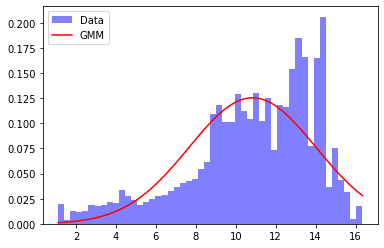

In [ ]:
# Extract the total number of cases 
X = data["Total cases"].values.reshape(-1,1)
state_data = data[data["Confirmed"] >= 1].groupby(["State/UnionTerritory","Date","Time"]).sum()
X = state_data["Total cases"].values.reshape(-1,1)
# Train the GMM with a single component
gmm = GaussianMixture(n_components=1)
gmm.fit(X)
# Get the estimated mean and covariance of the Gaussian distribution
mean = gmm.means_[0][0]
cov = gmm.covariances_[0][0][0]
print("Estimated mean:", mean)
print("Estimated covariance:", cov)
# Plot the histogram of the data and the estimated Gaussian distribution
plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Data')
x = np.linspace(X.min(), X.max(), 100)
y = 1/np.sqrt(2*np.pi*cov)*np.exp(-(x-mean)**2/(2*cov))
plt.plot(x, y, color='red', label='GMM')
plt.legend()
plt.show()


Estimated mean: 11.55907273096977
Estimated covariance: 5.784899770801167


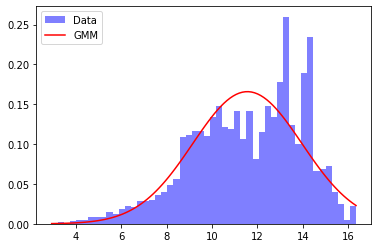

In [ ]:
# Extract the total number of cases for a single state
X = data["Total cases"].values.reshape(-1,1)
state_data = data[data["Deaths"] > 0].groupby(["State/UnionTerritory","Date","Time"]).sum()
X = state_data["Total cases"].values.reshape(-1,1)
# Train the GMM with a single component
gmm = GaussianMixture(n_components=1)
gmm.fit(X)
# Get the estimated mean and covariance of the Gaussian distribution
mean = gmm.means_[0][0]
cov = gmm.covariances_[0][0][0]
print("Estimated mean:", mean)
print("Estimated covariance:", cov)
# Plot the histogram of the data and the estimated Gaussian distribution
plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Data')
x = np.linspace(X.min(), X.max(), 100)
y = 1/np.sqrt(2*np.pi*cov)*np.exp(-(x-mean)**2/(2*cov))
plt.plot(x, y, color='red', label='GMM')
plt.legend()
plt.show()


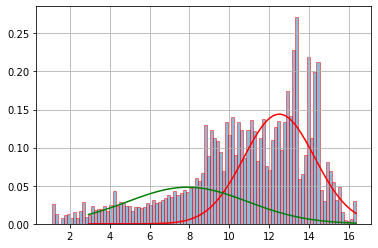

In [ ]:
# Extract the total number of cases 
state_data = data[data["Confirmed"] >= 1].groupby(["State/UnionTerritory","Date","Time"]).sum()
X = state_data["Total cases"].values.reshape(-1,1)
g = GaussianMixture(n_components=2,covariance_type='full')
g.fit(X)
weights = g.weights_
means = g.means_
covars = g.covariances_
x_axis = x
x_axis.sort()
plt.hist(X, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(x_axis,weights[0]*stats.norm.pdf(x_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(x_axis,weights[1]*stats.norm.pdf(x_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
# first plotting the histogram and adding gaussian plots on them
# mean, variance and adding weight on it generates a gaussian plot (height)
plt.grid()
plt.show()

This code is training and plotting a Gaussian Mixture Model (GMM) with 2 components on the total number of confirmed COVID-19 cases in a particular state over time. The data is loaded into a pandas dataframe from a csv file "/content/covid_19_india.csv". The confirmed cases data is grouped by date, time, states and the total number of tests on those dates is extracted. The Gaussian Mixture Model is trained on this data, X.

The first plot shows the histogram of the data and the estimated Gaussian distribution. The GMM model is trained with a single component and the mean and covariance of the Gaussian distribution are estimated. The red curve shows the estimated Gaussian distribution and the blue bars show the histogram of the data.

The second plot shows the histogram of the data and two Gaussian distributions (in red and green) that fit the data. The Gaussian Mixture Model is trained with 2 components, and the mean, covariance, and weight of each component are estimated. The red and green curves are the estimated Gaussian distributions, with their heights proportional to the estimated weights of the corresponding components.

The x-axis represents the total number of tests, and the y-axis represents the probability density function of the estimated Gaussian distributions. The graph shows how the data is fitted with two Gaussian distributions and how the model is able to capture the underlying structure of the data.

This code performs the following steps:

Extracts the total number of cases for a single state from the input data where the number of confirmed cases is greater than or equal to 1.
Reshapes the extracted data into an array X with a single column.
Creates an instance of the GaussianMixture class with two components and a 'full' covariance type.
Fits the model to the data X using the fit method of the GaussianMixture object.
Extracts the weights, means, and covariances of the fitted model.
Sorts the X values along the x-axis.
Plots the histogram of the data with 100 bins, normalized to a density of 1, with red bars and a transparency of 0.5.
Plots two Gaussian curves on top of the histogram, one in red and one in green, using the weights, means, and covariances from the fitted model to calculate the curve heights at each x value.
Displays the plot with a grid.

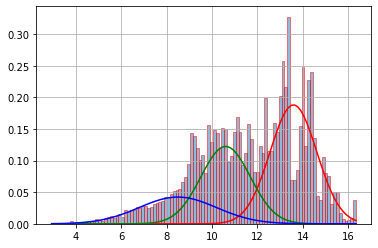

In [ ]:
# Extract the total number of cases for a single state
failed_data = data[data["Deaths"] >= 1].groupby(["State/UnionTerritory","Date","Time"]).sum()
Y = failed_data["Total cases"].values.reshape(-1,1)
# Train the GMM with a single component
g = GaussianMixture(n_components=3,covariance_type='full')
g.fit(Y)
weights = g.weights_
means = g.means_
covars = g.covariances_
x_axis = x
x_axis.sort()
plt.hist(Y, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
plt.plot(x_axis,weights[0]*stats.norm.pdf(x_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(x_axis,weights[1]*stats.norm.pdf(x_axis,means[1],np.sqrt(covars[1])).ravel(), c='green')
plt.plot(x_axis,weights[2]*stats.norm.pdf(x_axis,means[2],np.sqrt(covars[2])).ravel(), c='blue')
plt.grid()
plt.show()

This code is plotting a graph of the total number of deaths over a period of time. The code uses the Gaussian Mixture Model (GMM) to fit a mixture of Gaussian distributions to the data. The GMM is trained using the "Deaths" column of the data, which has the total number of failed tests for each date. The GMM has 3 components, which means it fits 3 Gaussian distributions to the data.

The resulting means, variances, and weights of the Gaussian distributions are used to plot the Gaussian curves on top of a histogram of the data. The histogram shows the frequency of the total number of failed tests, while the Gaussian curves show the overall shape of the distribution of the deaths. The 3 Gaussian curves are plotted in different colors (red, green, and blue) to distinguish between the different components of the GMM. The output is a graph that shows the distribution of the total number of Deaths over time.

The above code aggregates the data for all states in the dataset.

 It first filters out rows where the "Confirmed" cases are greater than or equal to 1 using data[data["Deaths"] >= 1], groups the remaining rows by "State/UnionTerritory", "Date", and "Time" using .groupby(["State/UnionTerritory","Date","Time"]), and then sums the "Total cases" column for each group using .sum(). This results in a new DataFrame called state_data that has the total number of cases for each state, on each date and time.

The Gaussian Mixture Model (GMM) is then trained on the "Total cases" values for all states using X = state_data["Total cases"].values.reshape(-1,1). Finally, the code plots the histogram of the "Total cases" values using plt.hist(X, bins=100, histtype='bar', density=True, ec='red', alpha=0.5) and overlays two Gaussian distributions on top of the histogram using plt.plot